In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [3]:
happy1=cv2.imread("C:/RESEARCH/FER2013NEW/train/happy/Training_50580.jpg")

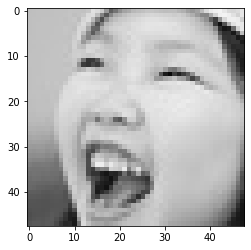

In [4]:
plt.imshow(happy1)

In [5]:
happy1.shape

(48, 48, 3)

In [7]:
neutral=cv2.imread("C:/RESEARCH/FER2013NEW/train/neutral/Training_98123.jpg")

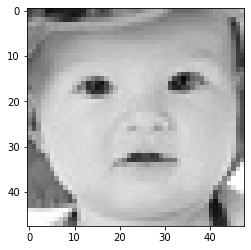

In [8]:
plt.imshow(neutral)

In [9]:
type(happy1)

numpy.ndarray

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

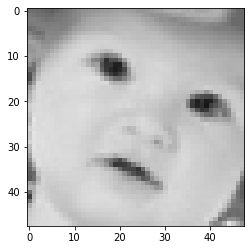

In [13]:
plt.imshow(image_gen.random_transform(happy1))

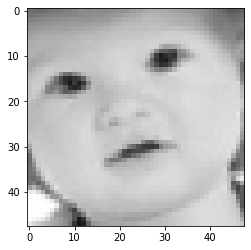

In [14]:
plt.imshow(image_gen.random_transform(happy1))

In [15]:
image_gen.flow_from_directory("C:/RESEARCH/FER2013NEW/train")

Found 28709 images belonging to 7 classes.


In [16]:
image_gen.flow_from_directory("C:/RESEARCH/FER2013NEW/test")

Found 7178 images belonging to 7 classes.


In [17]:
image_shape=(48,48,3)

In [18]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [23]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(48,48,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(48,48,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(48,48,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(48,48,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 64)        

In [25]:
#model training

In [30]:
batch_size=32
train_image_gen=image_gen.flow_from_directory("C:/RESEARCH/FER2013NEW/train",
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [31]:
batch_size=32
test_image_gen=image_gen.flow_from_directory("C:/RESEARCH/FER2013NEW/test",
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [32]:
train_image_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [36]:
results=model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100


C:\Users\PRASANTA\AppData\Local\Temp\ipykernel_13972\3692597751.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results=model.fit_generator(train_image_gen,epochs=100,


150/150 [==============================] - 24s 160ms/step - loss: 1.7466 - accuracy: 0.2823 - val_loss: 1.7292 - val_accuracy: 0.2630
Epoch 2/100
150/150 [==============================] - 23s 155ms/step - loss: 1.7423 - accuracy: 0.2821 - val_loss: 1.7310 - val_accuracy: 0.2891
Epoch 3/100
150/150 [==============================] - 23s 154ms/step - loss: 1.7430 - accuracy: 0.2825 - val_loss: 1.7475 - val_accuracy: 0.2812
Epoch 4/100
150/150 [==============================] - 22s 148ms/step - loss: 1.7304 - accuracy: 0.2885 - val_loss: 1.7247 - val_accuracy: 0.3177
Epoch 5/100
150/150 [==============================] - 22s 144ms/step - loss: 1.7018 - accuracy: 0.3159 - val_loss: 1.7514 - val_accuracy: 0.2943
Epoch 6/100
150/150 [==============================] - 22s 144ms/step - loss: 1.7067 - accuracy: 0.3023 - val_loss: 1.7190 - val_accuracy: 0.3203
Epoch 7/100
150/150 [==============================] - 21s 140ms/step - loss: 1.7063 - accuracy: 0.3002 - val_loss: 1.6817 - val_accurac

In [37]:
results.history['accuracy']

[0.2822916805744171,
 0.28208333253860474,
 0.2824999988079071,
 0.28854167461395264,
 0.3159438371658325,
 0.3022916615009308,
 0.30020833015441895,
 0.31208333373069763,
 0.3227083384990692,
 0.3283333480358124,
 0.3479166626930237,
 0.3400000035762787,
 0.35407501459121704,
 0.3595833480358124,
 0.3633333444595337,
 0.3466666638851166,
 0.37812501192092896,
 0.3777083456516266,
 0.3764583468437195,
 0.3864583373069763,
 0.38333332538604736,
 0.3883333206176758,
 0.39645832777023315,
 0.4045833349227905,
 0.40187498927116394,
 0.3981249928474426,
 0.40062499046325684,
 0.4087499976158142,
 0.40437498688697815,
 0.4233333468437195,
 0.41854166984558105,
 0.4166666567325592,
 0.4285416603088379,
 0.4195833206176758,
 0.4216666519641876,
 0.42572805285453796,
 0.43187499046325684,
 0.4416666626930237,
 0.43666666746139526,
 0.4447936415672302,
 0.4470982551574707,
 0.4424999952316284,
 0.44144144654273987,
 0.4387499988079071,
 0.45625001192092896,
 0.46867796778678894,
 0.4545833468437

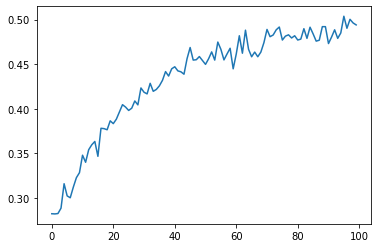

In [38]:
plt.plot(results.history['accuracy'])

In [48]:
import numpy as np

dog_file = "C:/RESEARCH/FER2013NEW/train/happy/Training_169588.jpg"

dog_img = image.load_img(dog_file, target_size=(48, 48))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [42]:
import keras.utils as image

In [49]:
prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 40ms/step


In [51]:
prediction_prob

array([[3.4283428e-03, 8.4784953e-04, 4.7744946e-03, 9.8161352e-01,
        4.3691820e-03, 2.0368211e-03, 2.9299373e-03]], dtype=float32)